# Curve Fitting 1

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### The mean as a model fitting solution



In [ ]:
### Build some random data
rain1 = np.array([0.24, 0.26, 0.28, 0.18, 0.21, 0.23, 0.20, 0.24])
rain2 = np.array([0.02, 0.03, 0.06, 0.85, 0.01, 0.04, 0.80, 0.03])

df = pd.DataFrame(columns = ['rain1', 'rain2'])
df['rain1'] = rain1
df['rain2'] = rain2

df['mean1'] = df['rain1'].mean()
df['mean2'] = df['rain2'].mean()

How close is the mean to the data? Let's plot it:

In [ ]:
df['rain1'].plot(marker = 'o', ylim = (0, 1))
df['mean1'].plot(linestyle = '--')

In [ ]:
df['rain2'].plot(marker = 'o')
df['mean2'].plot(linestyle = '--')

<font color=green> __In which case does the mean fit better?__

<font color=green> __Standard deviation:__

<font color=green> __Goodness of fit:__

<font color=green> __Residual / predicted error:__

<font color=green> __Optimization:__

<font color=green> __How is the mean like a model fit?__

In [ ]:
def rmse(yseries, yhat):
    return np.sqrt(1/(len(yseries) - 1) * sum((yseries[i] - yhat)**2 for i in range(len(yseries))))
### Call it like this: rmse(df['rain1'], y); plug in a few different values for y. How small can you get it?

After you've tried a few values above, run the code below. Did any of your values get a RMSE that small?

In [ ]:
print(rmse(df['rain1'], df['rain1'].mean()))

<font color=green> __What other "point models" can we fit and how?__

<font color=green> __Point estimate:__

### Fitting a line

Example data: Arctic sea ice extent.

In [ ]:
df = pd.read_csv('data_79_17.csv', index_col=0)
df.head()

In [ ]:
# What are the values? Per-date average sea ice extent for each year from 1979 to 2017.
# To get annual averages, we calculate a mean along the rows:
df['mean'] = df.mean(axis=1)
df.head(5).iloc[:, -3:]

In [ ]:
# Plot the annual average over time
df['mean'].plot(marker='o', label='Extent', rot=30)
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [ ]:
# Let's calculate the overall mean: the mean of all the means
df['overall mean'] = df['mean'].mean()
df.head(5).iloc[:, -3:]

In [ ]:
df['overall mean'].plot(linestyle='--', label='Overall Mean')
df['mean'].plot(marker='o', label='Extent', rot=30)
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [ ]:
years_array = sm.add_constant(df.index.values)
model = sm.OLS(df['mean'], years_array)
results = model.fit()
results.params

In [ ]:
years_array[:5]

In [ ]:
xs = np.arange(1979, 2018)
ys = results.params['x1'] * xs + results.params['const']
plt.plot(xs, ys, linewidth=4)
df['overall mean'].plot(linestyle='--', label='Overall Mean')
ax = df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30)
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

### Making a prediction

Write a line of code to predict the mean sea ice extent in 2030.

Write a line of code to calculate the year that the mean sea ice extent will be 0.

In [ ]:
"out of ice in: " # finish the line here

<font color=green> __Extrapolation:__

<font color=green> __Why extrapolation can be problematic:__

### Comparing the two models

In [ ]:
df['overall mean'].plot(linestyle='--', label='Overall Mean')
df['mean'].plot(marker='o', label='Extent', rot=30)
overall_mean = df['overall mean'].iloc[0]
plt.plot(xs, ys, linewidth=4)
df['overall mean'].plot(linestyle='--', label='Overall Mean')
ax = df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30)
sse_mean = 0
for x in df.index:
    plt.plot([x, x], [df.loc[x, 'mean'], overall_mean])
    sse_mean += (df.loc[x, 'mean'] - overall_mean)**2
ax = plt.gca()
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [ ]:
plt.plot(xs, ys, linewidth=4)
sse_line = 0
plt.plot(xs, ys, linewidth=4)
ax = df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30)
sse_line = 0
for i in range(len(xs)):
    plt.plot([xs[i], xs[i]], [df.loc[xs[i], 'mean'], ys[i]])
    sse_line += (df.loc[xs[i], 'mean'] - ys[i])**2
df['mean'].plot(linestyle='', marker='o', label='Extent', rot=30)
ax.set_ylabel(r"NH Sea Ice Extent ($10^6$ km$^2$)", fontsize=24)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
ax.legend()

In [ ]:
# Sum of squared residuals for our point estimate
sse_mean

In [ ]:
# Sum of squared residuals for our linear model
sse_line

In [ ]:
results.summary()


<font color=green> __$\hat{y}$:__

In [ ]:
for attr in dir(results):
    if 'mse' in attr.lower():
        print(attr)

In [ ]:
results.mse_resid


<font color=green> __Sum of squared error, SSE:__

<font color=green> __Mean squared error, MSE:__

<font color=green> __Root mean squared error, RMSE:__

<font color=green> __Simple linear regression:__

<font color=green> __Ordinary least squares, OLS:__

<font color=green>__Coefficient of determination, $R^2$:__

<font color=green>__Model:__

<font color=green> __Multiple linear regression:__

<font color=green>__Polynomial regression:__

### Fitting a curved model

In [2]:
planets = pd.DataFrame(columns = ['name', 'axis', 'period'])
# Planets and dwarf planets 
planets['name'] = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto', 'Ceres', 'Eris']
planets['axis'] = [57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2873.8, 4500.0, 5906.4, 414.3, 10133.8]
planets['period'] = [88, 224.7, 365.26, 687.0, 4332.6, 10759.22, 30688.5, 60182.0, 90560.0, 1683.1, 203645.0]
planets

,name,axis,period
0,Mercury,57.9,88.00
1,Venus,108.2,224.70
2,Earth,149.6,365.26
3,Mars,227.9,687.00
4,Jupiter,778.6,4332.60
5,Saturn,1433.5,10759.22
6,Uranus,2873.8,30688.50
7,Neptune,4500.0,60182.00
8,Pluto,5906.4,90560.00
9,Ceres,414.3,1683.10


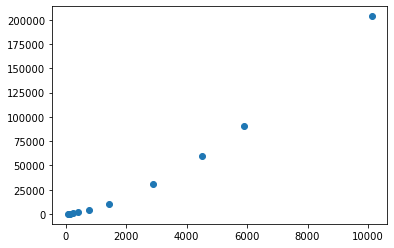

In [3]:
plt.plot(planets['axis'], planets['period'], 'o')

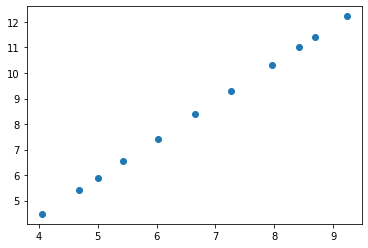

In [4]:
planets['logax'] = np.log(planets['axis'])
planets['logpd'] = np.log(planets['period'])
plt.plot(planets['logax'], planets['logpd'], 'o')

In [5]:
logax_array = sm.add_constant(planets['logax'].values)
model = sm.OLS(planets['logpd'], logax_array)
results = model.fit()
results.summary()

/usr/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logpd   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.559e+07
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           2.19e-29
Time:                        08:06:13   Log-Likelihood:                 53.220
No. Observations:                  11   AIC:                            -102.4
Df Residuals:                       9   BIC:                            -101.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6097      0.003   -615.701      0.000      -1.616      -1.604
x1             1.4996      0.000   3947.846      0.000       1.499       1.500
==============================================================================
Omnibus:                       23.094   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.161
Skew:                          -2.275   Prob(JB):                     0.000114
Kurtosis:                       7.350   Cond. No.                         28.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### More curve fitting

In [ ]:
curvedat = pd.read_csv('curvedat.csv')

In [ ]:
plt.plot(curvedat['x'], curvedat['y'], 'o')
plt.xticks(np.array([-np.pi/2, 0, np.pi/2, np.pi, 1.5*np.pi]),
           labels = ['$-\pi/2$', '0', '$\pi/2$', '$\pi$', '$3\pi/2$'])